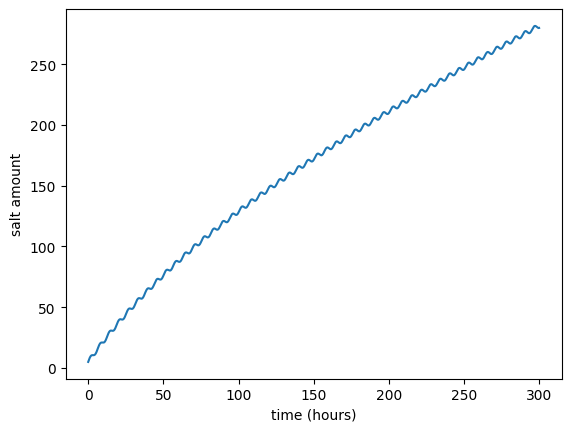

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define the differential equation
def dQ_dt(t, Q):
    return (9/5)*(1 + np.cos(t)) - (2*Q)/(200 + t)

# parameters
dt = 0.1          # time step
T = 300           # final time
N = int(T/dt)

# arrays
t = np.zeros(N+1)
Q = np.zeros(N+1)

# initial condition
Q[0] = 5

# Euler loop
for i in range(N):
    t[i+1] = t[i] + dt
    Q[i+1] = Q[i] + dt * dQ_dt(t[i], Q[i])

# plot
plt.plot(t, Q)
plt.xlabel("time (hours)")
plt.ylabel("salt amount")
plt.show()


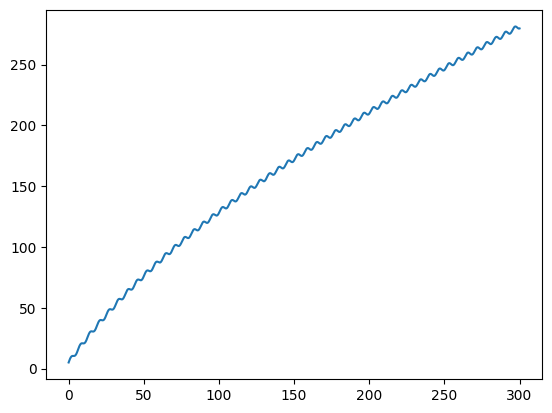

In [2]:
def rk4_step(f, t, Q, dt):
    k1 = f(t, Q)
    k2 = f(t + dt/2, Q + dt*k1/2)
    k3 = f(t + dt/2, Q + dt*k2/2)
    k4 = f(t + dt, Q + dt*k3)
    return Q + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

# reset
Q = np.zeros(N+1)
Q[0] = 5

for i in range(N):
    t[i+1] = t[i] + dt
    Q[i+1] = rk4_step(dQ_dt, t[i], Q[i], dt)

plt.plot(t, Q)
plt.show()
